

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> the dataset I've selected for analysis contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. 

>I will be analysing this data set to answer 2 questions:

         1) Which movies generally make the highest Revenue? 

         2) Which genres are most popular from year to year?










In [1]:
#import statements for the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 'magic word' so that visualizations are plotted inline with the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# load the data into a pandas data frame called df
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# show the data frame columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Cleaning Action: I will drop many columns that doesnt help answering my questions

In [4]:
#print out a few lines to explore the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# check how many rowes and columns
df.shape

(10866, 21)

In [6]:
# check how many duplicated values
df.duplicated().sum()

1

In [7]:
# check which record is duplicated 
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Cleaning Action: to delete this one duplicated record

In [8]:
# check how many rowes have null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Cleaning Action: I will drop any null record in geners feild 

In [9]:
# check the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Data types looks suitable for analysis

In [10]:
# check for the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

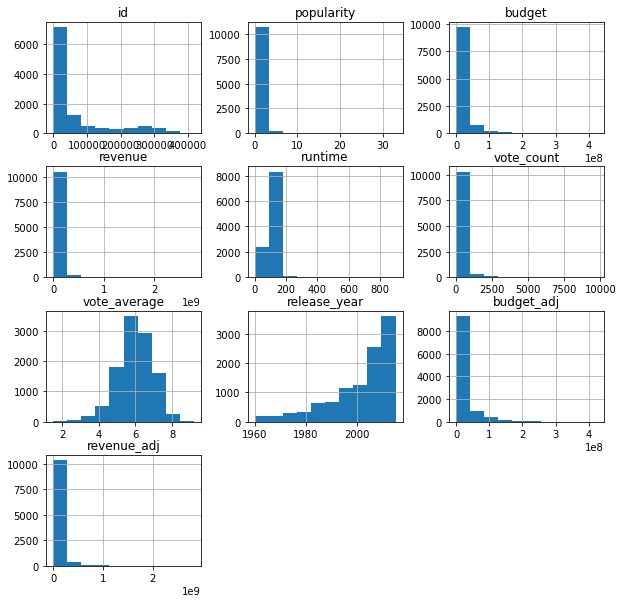

In [11]:
# check for the data distributions
df.hist(figsize = (10,10));

In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.



### Data Cleaning

In [13]:
# drop duplicates records
df.drop_duplicates(inplace=True)

In [14]:
#Check the new shape which should be 1 less than the previous one
df.shape

(10865, 21)

In [15]:
# drop the columns that are not needed for analysis
df.drop(['id', 'imdb_id','original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date','budget_adj',
       'revenue_adj'], axis='columns', inplace=True)

In [16]:
# check that I still have the needed coulmns
df.columns

Index(['popularity', 'budget', 'revenue', 'genres', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [17]:
# Check for the null values
df.isnull().sum()

popularity       0
budget           0
revenue          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [18]:
# I will delete records that have null genres
df.dropna(inplace=True)

In [19]:
# check that no nulls are left
df.isnull().sum()

popularity      0
budget          0
revenue         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movies generally make the highest Revenue? )

In [20]:
# to check which parameters have the highest corelation with revenue
df.corr()['revenue']

popularity      0.663268
budget          0.734851
revenue         1.000000
vote_count      0.791122
vote_average    0.173254
release_year    0.057324
Name: revenue, dtype: float64

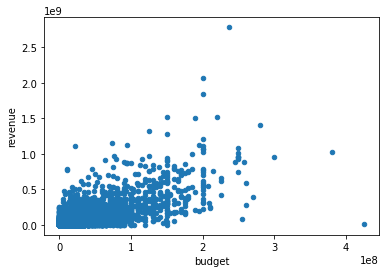

In [21]:
# Visualize the corelation between revenue and budget
df.plot(x='budget', y='revenue', kind='scatter');

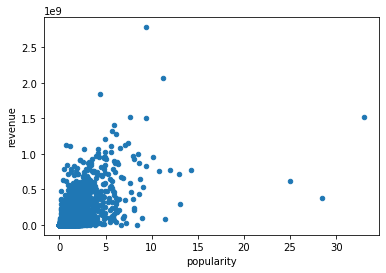

In [22]:
# Visualize the corelation between revenue and popularity
df.plot(x='popularity', y='revenue', kind='scatter');

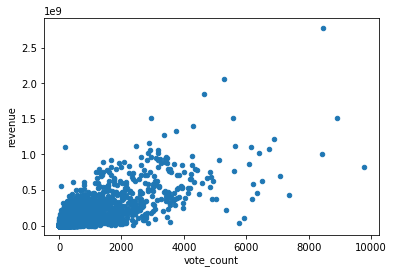

In [23]:
# Visualize the corelation between revenue and vote_count
df.plot(x='vote_count', y='revenue', kind='scatter');

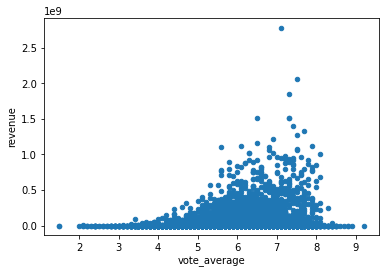

In [24]:
# Visualize the corelation between revenue and vote_average
df.plot(x='vote_average', y='revenue', kind='scatter');

so as a result, Revenue has the highest corelation with popularity, budget, vote_count. the corelation between Revenue & vote_average is weak.

Conclusion:

1) the highest revenu is generated by popular movies, this is expected as revenue is dependant on how many people purchase its tickets.

2) the highest revenu movies tend to have high voters, this is expected because number of people voting depends on how many people actually purchased a ticket and have watched the movie. 

3) the highest revenu movies tend to have high budgets, clearely people are attracted to the movies that invest in latest technologies and hire famous (expensive) directors and actors.

4) it is iteresting to see that high revenue has a weak corelation with the vote_average, this indicates that people often buy tickets dependig on the reputation of the movies to find later that it is not worth it 

### Research Question 2  (Which genres are most popular from year to year?)

In [35]:
# I created a function to plot geners from year to year
def my_plot(a_gener):
    df_tmp = df[df['genres'].str.contains(a_gener)]
    heights = df_tmp.groupby('release_year').mean().popularity
    locations = np.arange(1,len(heights)+1,1)
    plt.bar(locations, heights)
    plt.title('popularity from year to year ({})'.format(a_gener))
    plt.xlabel('years')
    plt.ylabel('popularity');

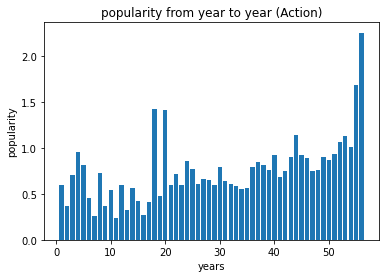

In [36]:
my_plot('Action')

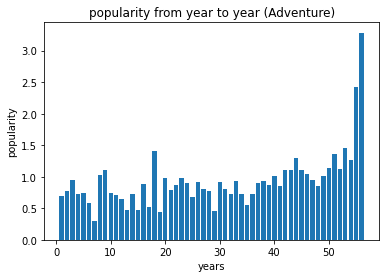

In [37]:
my_plot('Adventure')

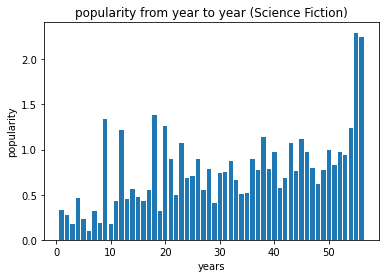

In [38]:
my_plot('Science Fiction')

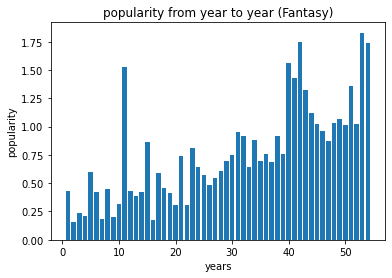

In [39]:
my_plot('Fantasy')

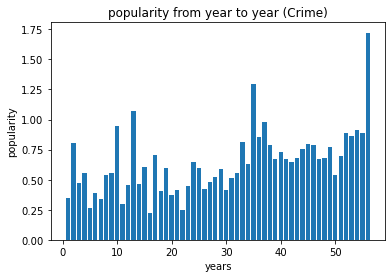

In [40]:
my_plot('Crime')

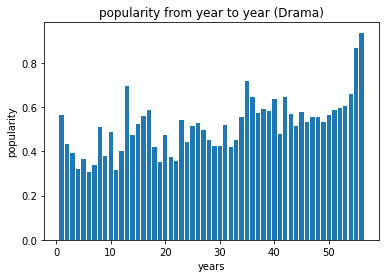

In [41]:
my_plot('Drama')

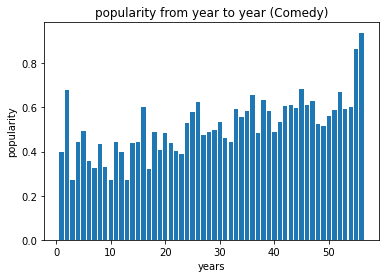

In [42]:
my_plot('Comedy')

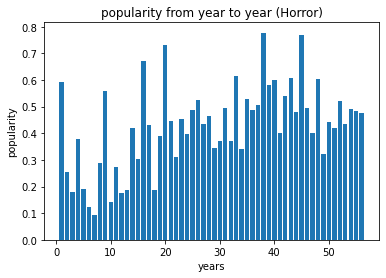

In [43]:
my_plot('Horror')

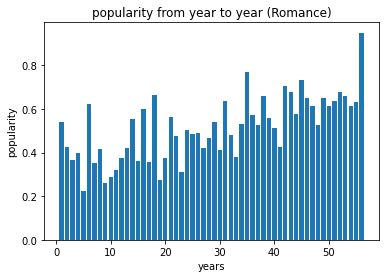

In [44]:
my_plot('Romance')

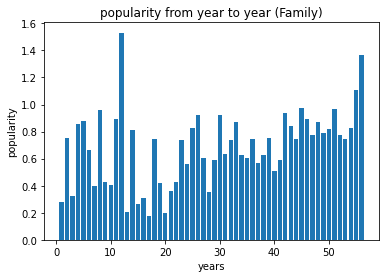

In [45]:
my_plot('Family')

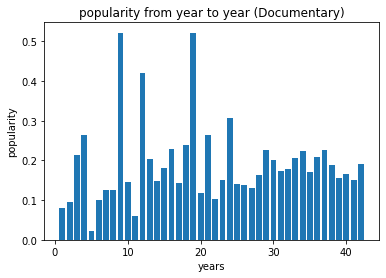

In [46]:
my_plot('Documentary')

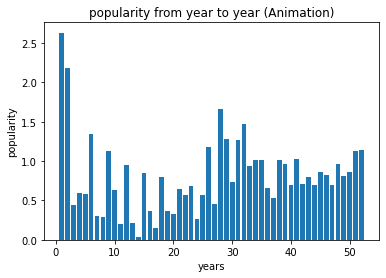

In [47]:
my_plot('Animation')

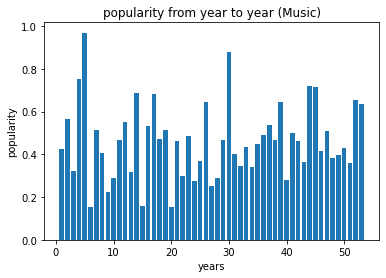

In [49]:
my_plot('Music')

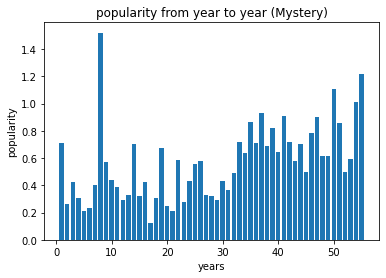

In [50]:
my_plot('Mystery')

<a id='conclusions'></a>
## Conclusions

Quesyion 1 Conclusions:

1) the highest revenu is generated by popular movies, this is expected as revenue is dependant on how many people purchase its tickets.

2) the highest revenu movies tend to have high voters, this is expected because number of people voting depends on how many people actually purchased a ticket and have watched the movie.

3) the highest revenu movies tend to have high budgets, clearely people are attracted to the movies that invest in latest technologies and hire famous (expensive) directors and actors.

4) it is iteresting to see that high revenue has a weak corelation with the vote_average, this indicates that people often buy tickets dependig on the reputation of the movies to find later that it is not worth it

Quesyion 2 Conclusions:

1) the popularity of most generes is increasing over years

2) music and documentry movies are not getting popular over years

3) Comedy, drama, since fiction, and crime are getting very popular in the last 2 years
